<a href="https://colab.research.google.com/github/Ahad4200/ML-LABS/blob/main/ML_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

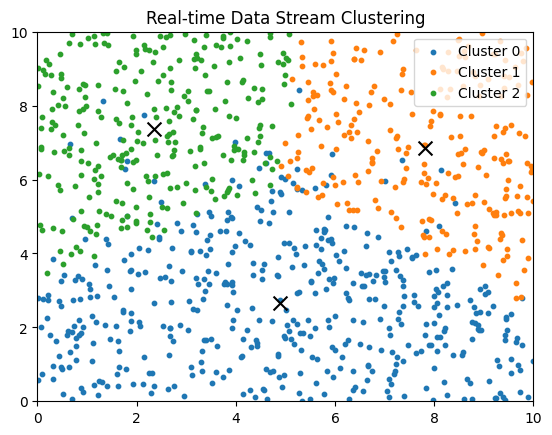

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time

# Simulation parameters
num_points = 1000  # Reduce to 100 for testing if needed
num_clusters = 3
outlier_threshold = 3.0
concept_drift_threshold = 0.5

# Data stream simulation
data_stream = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(num_points)]

# Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Micro-cluster structure
class MicroCluster:
    def __init__(self, centroid):
        self.centroid = centroid
        self.points = []
        self.count = 0
        self.sum = np.array(centroid)
        self.sum_squared = np.array(centroid)**2

    def update(self, point):
        self.count += 1
        self.points.append(point)
        self.sum += np.array(point)
        self.sum_squared += np.array(point)**2
        self.centroid = self.sum / self.count

    def get_variance(self):
        return (self.sum_squared / self.count) - (self.sum / self.count)**2

# Initialize centroids and micro-clusters
centroids = random.sample(data_stream, num_clusters)
micro_clusters = [MicroCluster(centroid) for centroid in centroids]

# Visualization setup
fig, ax = plt.subplots()

# Main clustering loop
for i, point in enumerate(data_stream):
    # Find nearest cluster
    min_dist = float('inf')
    closest_cluster = None
    for j, cluster in enumerate(micro_clusters):
        dist = euclidean_distance(point, cluster.centroid)
        if dist < min_dist:
            min_dist = dist
            closest_cluster = j

    # Assign point and update microcluster
    micro_clusters[closest_cluster].update(point)

    # Outlier detection
    if min_dist > outlier_threshold:
        print(f"Outlier detected at point {i}")

    # Concept drift detection
    if any(c.count > concept_drift_threshold * num_points for c in micro_clusters):
        print(f"Potential concept drift at point {i}")

    # Visualization (update every point or adjust frequency)
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    for cluster in micro_clusters:
        if cluster.points:
            ax.scatter(*zip(*cluster.points), s=10, label=f"Cluster {micro_clusters.index(cluster)}")
        ax.scatter(*cluster.centroid, marker="x", s=100, color="black")
    ax.set_title("Real-time Data Stream Clustering")
    ax.legend()
    clear_output(wait=True)
    display(fig)
    time.sleep(0.01)  # Adjust or remove based on performance

plt.close(fig)  # Clean up after loop